In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import cv2

In [9]:
from sklearn.ensemble import RandomForestClassifier


In [10]:
test_image = cv2.imread('Paint_image/logo_drew/tinder_1.png')
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
test_image=255-test_image
test_image = cv2.resize(test_image, (8, 8))

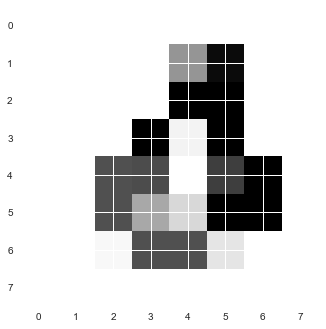

In [11]:
plt.imshow(test_image)

In [12]:
test_image 

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 128, 245,   0,   0],
       [  0,   0,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0, 255,  24, 255,   0,   0],
       [  0,   0, 192, 195,   0, 205, 255,   0],
       [  0,   0, 192, 112,  64, 255, 255,   0],
       [  0,   0,  14, 192, 192,  46,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

Il faut créer une base de données 

On veut créer de la manière : ['data', 'target', 'target_names', 'images']

Liste ou numpy ? voire un dico ..

https://docs.python.org/3/library/glob.html


In [31]:
from glob import glob
import os

In [32]:
imPath = "Paint_image/logo_drew/"
ls_path = glob(os.path.join(imPath, '*' ))

In [35]:
ls_path

['Paint_image/logo_drew\\messenger_1.png',
 'Paint_image/logo_drew\\messenger_10.png',
 'Paint_image/logo_drew\\messenger_2.png',
 'Paint_image/logo_drew\\messenger_3.png',
 'Paint_image/logo_drew\\messenger_4.png',
 'Paint_image/logo_drew\\messenger_5.png',
 'Paint_image/logo_drew\\messenger_6.png',
 'Paint_image/logo_drew\\messenger_7.png',
 'Paint_image/logo_drew\\messenger_8.png',
 'Paint_image/logo_drew\\messenger_9.png',
 'Paint_image/logo_drew\\tinder_1.png',
 'Paint_image/logo_drew\\tinder_10.png',
 'Paint_image/logo_drew\\tinder_2.png',
 'Paint_image/logo_drew\\tinder_3.png',
 'Paint_image/logo_drew\\tinder_4.png',
 'Paint_image/logo_drew\\tinder_5.png',
 'Paint_image/logo_drew\\tinder_6.png',
 'Paint_image/logo_drew\\tinder_7.png',
 'Paint_image/logo_drew\\tinder_8.png',
 'Paint_image/logo_drew\\tinder_9.png']

In [42]:
%%time
name_to_label ={'tinder':1,'messenger':2}   #Pour labeliser facilement
l=[]
for file in ls_path:                        #On parcours tous les fichiers                
    im = cv2.imread(file,0)                 #On charge l'image
    im=255-im                               #On inverse le contrast 
    im = cv2.resize(im, (8, 8))             #On met au bon format de pixels
    name= file.split('\\')[1].split('_')[0] #On extrait le type
    l+=[[np.ndarray.flatten(test_image),name_to_label[name],name,im]] #On met tout ensemble
l # Le ième élément est une photo de la forme [donnée pour ML,label,nom du label,image]

Wall time: 19 ms


test avec array


In [59]:
#%%time
name_to_label ={'tinder':1,'messenger':2} #Pour labeliser facilement
data=np.array([])
label=np.array([])
nom_label=np.array([])
image=np.array([])
data_base={'data': data, 'label' : label,'nom_label' :nom_label,'image':image}
for file in ls_path:                        #On parcours tous les fichiers                
    im = cv2.imread(file,0)                 #On charge l'image
    im=255-im                               #On inverse le contrast 
    im = cv2.resize(im, (8, 8))             #On met au bon format de pixels
    name= file.split('\\')[1].split('_')[0] #On extrait le type
    data_base['data']=np.append(data_base['data'],np.ndarray.flatten(test_image), axis=0) 
    data_base['label']=np.append(data_base['label'],name_to_label[name])
    data_base['nom_label']=np.append(data_base['nom_label'],name)
    #data_base['image']=np.append(data_base['image'],im, axis=0)
    
    
    
    #On met tout ensemble
data_base['data'] # Le ième élément est une photo de la forme [donnée pour ML,label,nom du label,image]

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
data=np.array([])

In [50]:
data

array([], dtype=float64)

In [52]:
np.append(data,1)

array([1.])

Test avec list 

In [63]:
#%%time
name_to_label ={'tinder':1,'messenger':2} #Pour labeliser facilement
data_base={'data': [], 'label' : [],'nom_label' :[],'image':[]}
for file in ls_path:                        #On parcours tous les fichiers                
    im = cv2.imread(file,0)                 #On charge l'image
    im=255-im                               #On inverse le contrast 
    im = cv2.resize(im, (8, 8))             #On met au bon format de pixels
    name= file.split('\\')[1].split('_')[0] #On extrait le type
    data_base['data']+=[[np.ndarray.flatten(test_image)]]
    data_base['label']+=[name_to_label[name]]
    data_base['nom_label']+=[name]
    data_base['image']+=[[im]]
data_base['data']=np.array(data_base['data'])
data_base['label']=np.array(data_base['label'])
data_base['nom_label']=np.array(data_base['nom_label'])
data_base['image']=np.array(data_base['image'])
    
    
    
data_base

{'data': array([[[0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0]]], dtype=uint8),
 'image': array([[[[  0,   0,   0, ...,   0,   0,   0],
          [  0,   0,   0, ...,   0,   0,   0],
          [  0,   0,  16, ...,   0,   0,   0],
          ...,
          [  0,   0,   0, ...,   4,   0,   0],
          [  0,   0,   0, ...,   0,   0,   0],
          [  0,   0,   0, ...,   0,   0,   0]]],
 
 
        [[[  0,   0,   0, ...,   0,   0,   0],
          [  0,   0,   0, ..., 203,  66,   0],
          [  0,   0,   0, ..., 255, 192,   0],
          ...,
          [  0,   0,   0, ..., 255,  40, 255],
          [  0,   0,   0, ..., 255, 255,   0],
          [  0,   0,   0, ..., 255,   0,   0]]],
 
 
        [[[  0,   0,   0, ...,   0,   0,   0],
          [  0,   0,   0, ...,   0,   0,   0],
          [  0,   0,   0, ..., 25